# Where is the International Space Station?

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# docs here: http://open-notify.org/Open-Notify-API/ISS-Location-Now/

In [3]:
url = 'http://api.open-notify.org/iss-now.json'

In [4]:
df = pd.read_json(url)

In [5]:
df

,timestamp,message,iss_position
latitude,2021-10-06 03:28:45,success,42.1309
longitude,2021-10-06 03:28:45,success,132.6312


In [6]:
df['latitude'] = df.loc['latitude', 'iss_position']
df['longitude'] = df.loc['longitude', 'iss_position']
df.reset_index(drop=True, inplace=True)

In [7]:
df

,timestamp,message,iss_position,latitude,longitude
0,2021-10-06 03:28:45,success,42.1309,42.1309,132.6312
1,2021-10-06 03:28:45,success,132.6312,42.1309,132.6312


In [8]:
df.drop(['message', 'iss_position'], axis=1, inplace=True)

In [9]:
df

,timestamp,latitude,longitude
0,2021-10-06 03:28:45,42.1309,132.6312
1,2021-10-06 03:28:45,42.1309,132.6312


In [10]:
df = df.head(1)

In [11]:
df

,timestamp,latitude,longitude
0,2021-10-06 03:28:45,42.1309,132.6312


---

### Where is it orbiting the earth? 

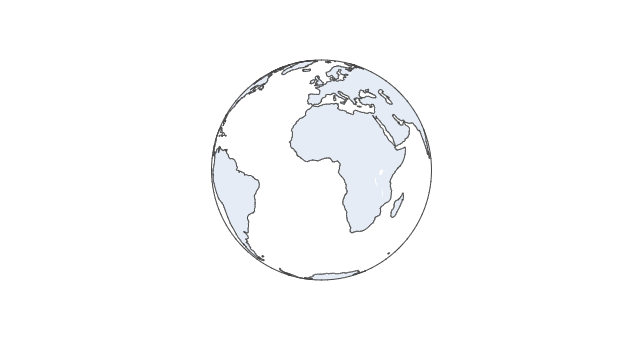

In [13]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude')
fig.update_geos(projection_type='orthographic')
fig.show()